In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
from sklearn.model_selection import cross_val_score,train_test_split # 交叉驗證
import sklearn.datasets as datasets

#決策樹繪圖
import graphviz
from sklearn import tree

In [14]:
iris = datasets.load_iris()
X = iris['data']

y = iris['target']
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
clf= AdaBoostClassifier()

#相當於十次for循環
scores =  cross_val_score(clf,X,y,cv=10)
scores.mean()

0.952991452991453

In [37]:

ada = AdaBoostClassifier(n_estimators=12) # 學習率 也叫步驟

ada.fit(X_train,y_train)


ada.score(X_test,y_test)

1.0

In [35]:
ada = AdaBoostClassifier(n_estimators=1) # 學習率 也叫步驟

ada.fit(X_train,y_train)


ada.score(X_test,y_test)

0.6666666666666666

In [19]:
len(ada.estimators_)

50

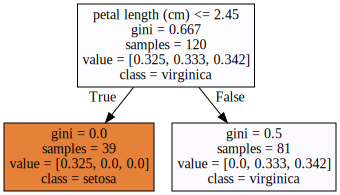

In [27]:
dot = tree.export_graphviz(ada.estimators_[0],out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

graphviz.Source(dot)

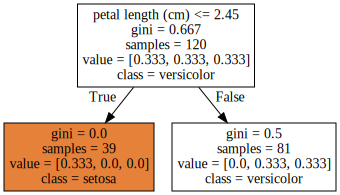

In [29]:
dot = tree.export_graphviz(ada.estimators_[10],out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

graphviz.Source(dot)

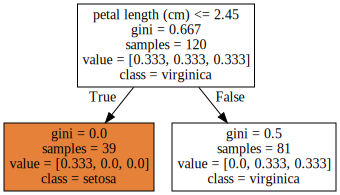

In [30]:
dot = tree.export_graphviz(ada.estimators_[30],out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

graphviz.Source(dot)

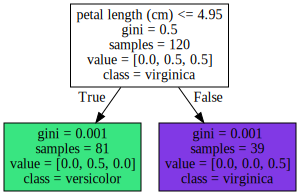

In [32]:
dot = tree.export_graphviz(ada.estimators_[11],out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

graphviz.Source(dot)

# 使用決策樹算法

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from pandas import Series,DataFrame
import numpy as np

In [91]:
X = DataFrame({'購物':[500,500,1500,1500],'是否百度問答':[0,1,0,1]})
y = np.array([14,16,24,26])

gbdt = GradientBoostingRegressor(n_estimators=10)

gbdt.fit(X ,y)


GradientBoostingRegressor(n_estimators=10)

In [92]:
gbdt.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13FEE90C940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13FEE90C940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13FEE90C940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13FEE90C940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13FEE90C940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13FEE90C940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
             

In [93]:
gbdt.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x13FEE90C940)],
      dtype=object)

In [100]:
((y-y.mean())**2).mean()

26.0

In [102]:
gbdt.estimators_[0,0].predict(X)

array([-6., -4.,  4.,  6.])

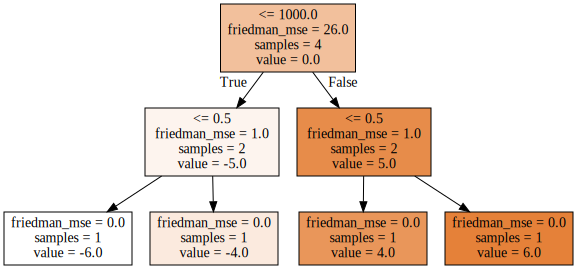

In [94]:
dot =tree.export_graphviz(gbdt.estimators_[0,0],out_file=None,feature_names=X.columns,filled = True)

graphviz.Source(dot)

In [ ]:
#mse 均方誤差越小 越好

In [107]:
from sklearn.metrics import mean_squared_error

In [108]:
y_ = gbdt.estimators_[1,0].predict(X)

mean_squared_error(y,y_)

400.26

In [110]:
((y_ - y_.mean())**2).mean()

21.06

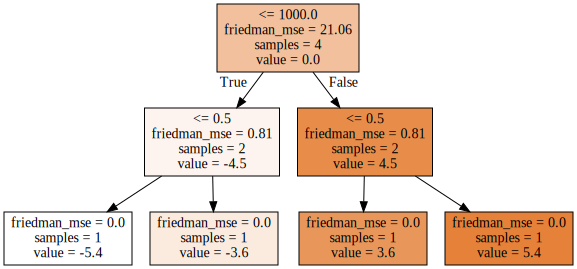

In [95]:
dot =tree.export_graphviz(gbdt.estimators_[1,0],out_file=None,feature_names=X.columns,filled = True)

graphviz.Source(dot)

In [115]:
y_ = gbdt.estimators_[2,0].predict(X)

np.power(y_ - y_.mean(),2).mean()

17.058600000000006

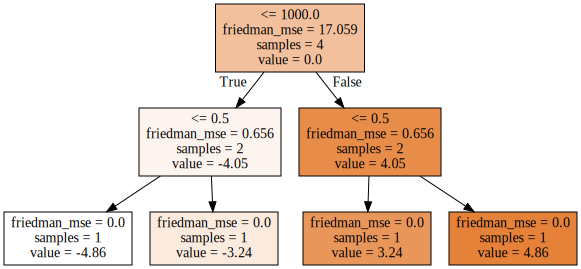

In [111]:
dot =tree.export_graphviz(gbdt.estimators_[2,0],out_file=None,feature_names=X.columns,filled = True,class_names=y)

graphviz.Source(dot)

In [118]:
y_ = gbdt.estimators_[-1,0].predict(X)
y_ 


array([-2.32452293, -1.54968196,  1.54968196,  2.32452293])

In [122]:
gbdt.predict(X)

array([16.09207064, 17.39471376, 22.60528624, 23.90792936])

In [120]:
y

array([14, 16, 24, 26])

In [119]:
np.power(y_ - y_.mean(),2).mean()

3.902460517721972

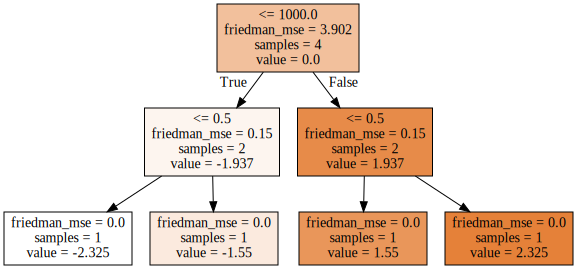

In [116]:
dot =tree.export_graphviz(gbdt.estimators_[-1,0],out_file=None,feature_names=X.columns,filled = True,class_names=y)

graphviz.Source(dot)

In [ ]:
#-------------------

In [85]:
len(gbdt.estimators_)

100

In [74]:
gbdt.score(X,y)

0.8784233454094307

In [87]:
gbdt = GradientBoostingClassifier()

gbdt.fit(X_train,y_train)

gbdt.score(X_test,y_test)

0.9666666666666667

In [76]:
gbdt.estimators_[0] # 因為是回歸

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x13FEE90C940),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x13FEE90C940),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x13FEE90C940)],
      dtype=object)

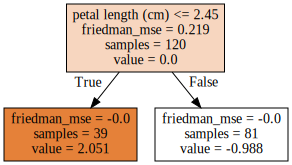

In [77]:
dot =tree.export_graphviz(gbdt.estimators_[0,0],feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

graphviz.Source(dot)

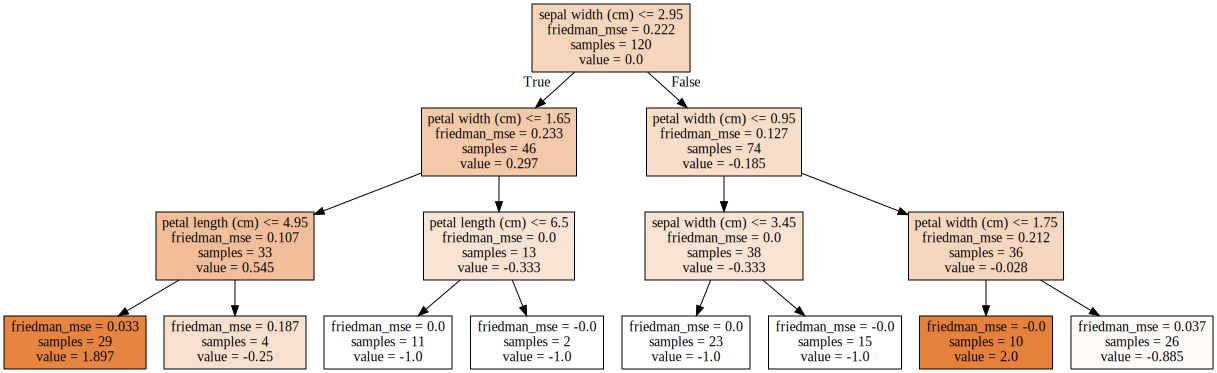

In [78]:
dot =tree.export_graphviz(gbdt.estimators_[0,1],feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

graphviz.Source(dot)

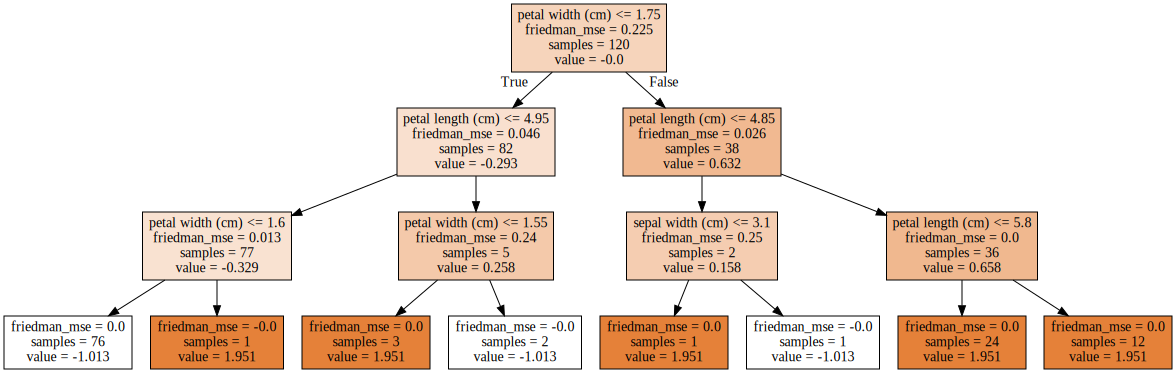

In [79]:
dot =tree.export_graphviz(gbdt.estimators_[0,2],feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

graphviz.Source(dot)

In [84]:
gbdt.estimators_[0,0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x13FEE90C940)

ValueError: Length of feature_names, 2 does not match number of features, 4